In [1]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import pandas as pd

from cobra import Reaction, Metabolite
from cobra.io import read_sbml_model
from math import log
from pathlib import Path

In [2]:
path = Path(r"C:\Users\mkcoo\Documents\UW\GitHub\PNSB\PettRidge\rpal.xml")
model = read_sbml_model(str(path.resolve()))

mdetails = pd.read_excel(r'C:\Users\mkcoo\Documents\UW\GitHub\PNSB\PettRidge\modelDetails.xlsx', sheet_name='Reactions')

Model does not contain SBML fbc package information.
SBML package 'layout' not supported by cobrapy, information is not parsed
SBML package 'render' not supported by cobrapy, information is not parsed
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species C00234 "10-Formyltetrahydrofolate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species C15606 "1,2-dihydroxy-3-keto-5-methylthiopentene">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species C00641DA "1,2-Diacyl-sn-glycerol (Dark Aerobic)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species C00641LN "1,2-Diacyl-sn-glycerol (Light Anaerobic)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species C04092 "1,2-Didehydropiperidine-2-carboxylate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species C05758 "trans-Dodec-2-enoyl-[acp]">
Use of the spec

## Setting relevant bounds and uptake rate(s)

In [3]:
# Setting acetate uptake rate to 0
model.reactions.XR57.bounds = (0, 0) # acetate

# CO2 import/export bounds
model.reactions.XR72.bounds = (0, 0)
model.reactions.XR73.bounds = (0, 1000)

# Permitting metabolite efflux for acetate
model.reactions.XR59.bounds = (0, 100)

## WT

In [4]:
cou_rates = np.linspace(0.1, 1, 50)
ac_rates = np.linspace(0.1, 3, 50)

In [5]:
# Initialize results
cou_dtimes = []
cou_cfixes = []

# Collect simulation results
for i, cou_rate in enumerate(cou_rates):
    model.reactions.XR242.bounds = (cou_rate, cou_rate) # Succinate
    
    solution = model.optimize()
    mu = solution.objective_value

    if mu > 0:
        # cou_dtimes.append(log(2) / mu) # doubling time (hr)
        cou_dtimes.append(mu*24)
        # cou_dtimes.append(mu) # objective value (1/hr)
        cou_stand_df = solution.to_frame()
        cou_cfixes.append(cou_stand_df.loc['R00024'].fluxes)

In [6]:
model.reactions.XR242.bounds = (0, 0)

In [7]:
# Initialize results
ac_dtimes = []
ac_cfixes = []

# Collect simulation results
for i, ac_rate in enumerate(ac_rates):
    model.reactions.XR57.bounds = (ac_rate, ac_rate) # Succinate
    
    solution = model.optimize()
    mu = solution.objective_value

    if mu > 0:
        # ac_dtimes.append(log(2) / mu) # doubling time (hr)
        ac_dtimes.append(mu*24)
        # ac_dtimes.append(mu) # objective value (1/hr)
        ac_stand_df = solution.to_frame()
        ac_cfixes.append(ac_stand_df.loc['R00024'].fluxes)

## FdxOR KO

In [8]:
model.reactions.R01195.bounds = (0, 0) # FXDR
model.reactions.XR57.bounds = (0, 0)

In [9]:
# Initialize results
couko_dtimes = []
couko_cfixes = []

# Collect simulation results
for i, cou_rate in enumerate(cou_rates):
    model.reactions.XR242.bounds = (cou_rate, cou_rate) # Succinate
    
    solution = model.optimize()
    mu = solution.objective_value

    if mu > 0:
        # couko_dtimes.append(log(2) / mu) # doubling time (hr)
        couko_dtimes.append(mu*24)
        # couko_dtimes.append(mu) # objective value (1/hr)
        couko_stand_df = solution.to_frame()
        couko_cfixes.append(couko_stand_df.loc['R00024'].fluxes)

In [10]:
model.reactions.XR242.bounds = (0, 0)

In [11]:
# Initialize results
acko_dtimes = []
acko_cfixes = []

# Collect simulation results
for i, ac_rate in enumerate(ac_rates):
    model.reactions.XR57.bounds = (ac_rate, ac_rate) # Succinate
    
    solution = model.optimize()
    mu = solution.objective_value

    if mu > 0:
        acko_dtimes.append(mu*24)
        acko_stand_df = solution.to_frame()
        acko_cfixes.append(acko_stand_df.loc['R00024'].fluxes)

## NADP Transhydrogenase KO

In [12]:
path = Path(r"C:\Users\mkcoo\Documents\UW\GitHub\PNSB\PettRidge\rpal.xml")
model = read_sbml_model(str(path.resolve()))

mdetails = pd.read_excel(r'C:\Users\mkcoo\Documents\UW\GitHub\PNSB\PettRidge\modelDetails.xlsx', sheet_name='Reactions')

Model does not contain SBML fbc package information.
SBML package 'layout' not supported by cobrapy, information is not parsed
SBML package 'render' not supported by cobrapy, information is not parsed
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species C00234 "10-Formyltetrahydrofolate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species C15606 "1,2-dihydroxy-3-keto-5-methylthiopentene">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species C00641DA "1,2-Diacyl-sn-glycerol (Dark Aerobic)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species C00641LN "1,2-Diacyl-sn-glycerol (Light Anaerobic)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species C04092 "1,2-Didehydropiperidine-2-carboxylate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species C05758 "trans-Dodec-2-enoyl-[acp]">
Use of the spec

## Setting relevant bounds and uptake rate(s)

In [13]:
# Setting acetate uptake rate to 0
model.reactions.XR57.bounds = (0, 0) # acetate

# CO2 import/export bounds
model.reactions.XR72.bounds = (0, 0)
model.reactions.XR73.bounds = (0, 1000)

# Permitting metabolite efflux for acetate
model.reactions.XR59.bounds = (0, 100)

In [14]:
model.reactions.XR13.bounds = (0, 0) # NAD(P) transhydrogenase KO

In [15]:
# Initialize results
coukot_dtimes = []
coukot_cfixes = []

# Collect simulation results
for i, cou_rate in enumerate(cou_rates):
    model.reactions.XR242.bounds = (cou_rate, cou_rate) # Succinate
    
    solution = model.optimize()
    mu = solution.objective_value

    if mu > 0:
        coukot_dtimes.append(mu*24)
        coukot_stand_df = solution.to_frame()
        coukot_cfixes.append(coukot_stand_df.loc['R00024'].fluxes)

In [16]:
model.reactions.XR242.bounds = (0, 0)

In [17]:
# Initialize results
ackot_dtimes = []
ackot_cfixes = []

# Collect simulation results
for i, ac_rate in enumerate(ac_rates):
    model.reactions.XR57.bounds = (ac_rate, ac_rate) # Succinate
    
    solution = model.optimize()
    mu = solution.objective_value

    if mu > 0:
        ackot_dtimes.append(mu*24)
        ackot_stand_df = solution.to_frame()
        ackot_cfixes.append(ackot_stand_df.loc['R00024'].fluxes)

## Plotting

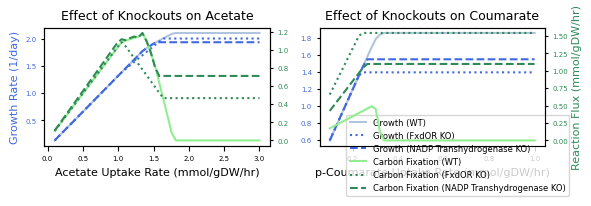

In [19]:
plt.rcParams.update({
    'font.size': 8,
    'axes.labelsize': 8,
    'axes.titlesize': 9,
    'xtick.labelsize': 5,
    'ytick.labelsize': 5
})

fig, (ax_ac, ax_cou) = plt.subplots(ncols=2, figsize=(6, 2), sharey=False)

# ---- Acetate subplot ----
color1 = 'lightsteelblue'
color2 = 'royalblue'
color3 = 'lightgreen'
color4 = 'seagreen'

# Growth rates
ax_ac.set_xlabel('Acetate Uptake Rate (mmol/gDW/hr)')
ax_ac.plot(ac_rates, ac_dtimes, label='Growth (WT)', color=color1)
ax_ac.plot(ac_rates, acko_dtimes, label='Growth (FxdOR KO)', color=color2, linestyle='dotted')
ax_ac.plot(ac_rates, ackot_dtimes, label='Growth (NADP Transhydrogenase KO)', color=color2, linestyle='dashed')
ax_ac.tick_params(axis='y', labelcolor=color2, length=2)
ax_ac.set_ylabel('Growth Rate (1/day)', color=color2)

# Carbon fixation flux
ax2_ac = ax_ac.twinx()
ax2_ac.plot(ac_rates, ac_cfixes, label='Carbon Fixation (WT)', color=color3)
ax2_ac.plot(ac_rates, acko_cfixes, label='Carbon Fixation (FxdOR KO)', color=color4, linestyle='dotted')
ax2_ac.plot(ac_rates, ackot_cfixes, label='Carbon Fixation (NADP Transhydrogenase KO)', color=color4, linestyle='dashed')
ax2_ac.tick_params(axis='y', labelcolor=color4, length=2)

# ---- Coumarate subplot ----
ax_cou.set_xlabel('p-Coumarate Uptake Rate (mmol/gDW/hr)')

# Growth rates
ax_cou.plot(cou_rates, cou_dtimes, label='Growth (WT)', color=color1)
ax_cou.plot(cou_rates, couko_dtimes, label='Growth (FxdOR KO)', color=color2, linestyle='dotted')
ax_cou.plot(cou_rates, coukot_dtimes, label='Growth (NADP Transhydrogenase KO)', color=color2, linestyle='dashed')
ax_cou.tick_params(axis='y', labelcolor=color2, length=2)

# Carbon fixation flux
ax2_cou = ax_cou.twinx()
ax2_cou.plot(cou_rates, cou_cfixes, label='Carbon Fixation (WT)', color=color3)
ax2_cou.plot(cou_rates, couko_cfixes, label='Carbon Fixation (FxdOR KO)', color=color4, linestyle='dotted')
ax2_cou.plot(cou_rates, coukot_cfixes, label='Carbon Fixation (NADP Transhydrogenase KO)', color=color4, linestyle='dashed')
ax2_cou.tick_params(axis='y', labelcolor=color4, length=2)

# For Coumarate subplot
ax2_cou.set_ylabel('Reaction Flux (mmol/gDW/hr)', color=color4, fontsize=8)
ax2_cou.yaxis.set_label_position("right")
ax2_cou.yaxis.set_label_coords(1.12, 0.5)

# Legends
lines_cou, labels_cou = ax_cou.get_legend_handles_labels()
lines2_cou, labels2_cou = ax2_cou.get_legend_handles_labels()
ax_cou.legend(lines_cou + lines2_cou, labels_cou + labels2_cou, bbox_to_anchor=(0.1, 0.3), fontsize=6)

# Titles
ax_ac.set_title('Effect of Knockouts on Acetate')
ax_cou.set_title('Effect of Knockouts on Coumarate')

plt.tight_layout()
plt.savefig("Fig2A.svg", bbox_inches='tight')
plt.show()